# imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from basin_volume import *

/home/adam/.conda/envs/jax311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import os
import pickle

# Early results

In [5]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results")

In [17]:
# ls results_dir chronologically
sorted(os.listdir(results_dir))


['31m_checkpoint_scan.pkl',
 '31m_cutoff_scan.pkl',
 'convnext_epsilons_1024_10.pkl',
 'convnext_epsilons_early_1024_10.pkl',
 'convnext_kl_basins.pkl',
 'convnext_timing_1024_100.pkl',
 'pythia_31m_chkpts_10_10.pkl',
 'pythia_31m_chkpts_20_100.pkl',
 'pythia_31m_chkpts_30_1.pkl',
 'pythia_31m_chkpts_32_1.pkl',
 'pythia_31m_chkpts_overnight_10_500.pkl',
 'pythia_31m_chkpts_test.pkl',
 'pythia_31m_final_test.pkl',
 'pythia_exponents_20_100.pkl',
 'pythia_high_cutoff_adam_20_10.pkl',
 'pythia_histo_False.pkl',
 'pythia_histo_True.pkl',
 'pythia_low_cutoff_adam_20_10.pkl',
 'pythia_normal_cutoff_adam_20_10.pkl',
 'pythia_overnight_adam_10_500.pkl',
 'pythia_overnight_cutoff_20_100.pkl',
 'pythia_overnight_cutoff_32_100.pkl',
 'pythia_overnight_cutoff_adam_20_100.pkl',
 'pythia_overnight_cutoff_adam_20_100_True.pkl',
 'pythia_timing_20_100.pkl',
 'pythia_very_high_cutoff_adam_20_10.pkl']

# Pythia val size

In [84]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-31m")
tokenizer.pad_token_id = 1
tokenizer.eos_token_id = 0


In [86]:
val_data = load_pythia_val_data(tokenizer, n_seqs=20)
print(val_data.shape)


torch.Size([20, 1024])


In [88]:
where_pad = val_data == tokenizer.pad_token_id
print(val_data[where_pad].shape)

torch.Size([10926])


# cutoff scans

In [6]:
with open(os.path.join(results_dir, "pythia_overnight_cutoff_adam_20_100.pkl"), "rb") as f:
    results_adam, cfg = pickle.load(f)


with open(os.path.join(results_dir, "pythia_overnight_cutoff_20_100.pkl"), "rb") as f:
    results_no_adam, cfg = pickle.load(f)



In [20]:
pythia_31m_model = load_pythia_checkpoint("143000", "31m")
model_dim = torch.nn.utils.parameters_to_vector(pythia_31m_model.parameters()).shape[0]
print(model_dim)

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


30494720


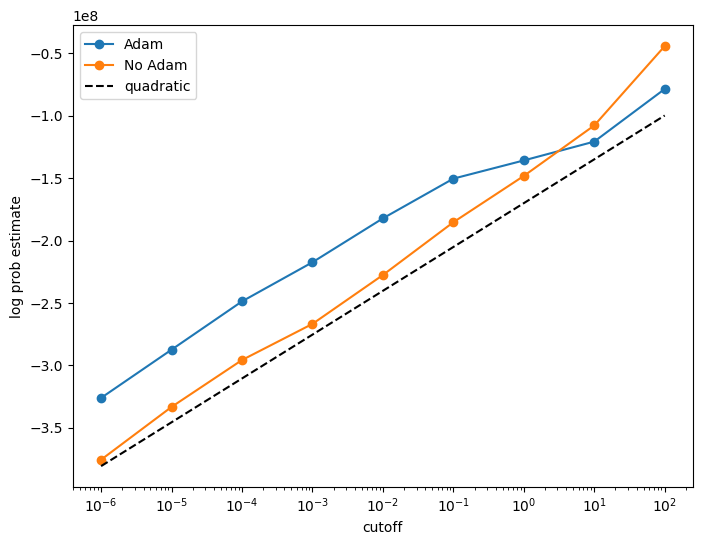

In [12]:
plt.figure(figsize=(8, 6))
maxes_adam = [result.estimates.max() for result in results_adam.values()]
plt.plot(list(results_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_no_adam = [result.estimates.max() for result in results_no_adam.values()]
plt.plot(list(results_no_adam.keys()), maxes_no_adam, 'o-', label="No Adam")

plt.xlabel("cutoff")
plt.ylabel("log prob estimate")
plt.xscale("log")
# line with slope model_dim/2
plt.plot(list(results_adam.keys()), 
         [model_dim/2 * np.log(cutoff) - 1.7e8 for cutoff in results_adam.keys()], 
         '--', color="black", 
         label="quadratic")
plt.legend()
plt.show()

# epsilon scans

In [8]:
with open(os.path.join(results_dir, "pythia_high_cutoff_adam_20_10.pkl"), "rb") as f:
    results_high_cutoff_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_low_cutoff_adam_20_10.pkl"), "rb") as f:
    results_low_cutoff_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_very_high_cutoff_adam_20_10.pkl"), "rb") as f:
    results_very_high_cutoff_adam, cfg = pickle.load(f)

In [22]:
results_high_cutoff_adam.keys()

dict_keys([np.float32(1e-09), np.float32(1e-08), np.float32(1e-07), np.float32(1e-06), np.float32(1e-05), np.float32(0.000100000005), np.float32(0.001), np.float32(0.01), np.float32(0.10000002)])

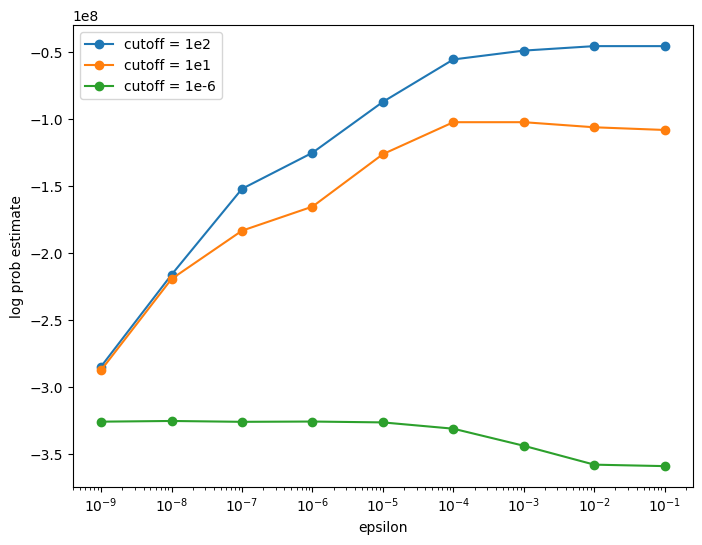

In [10]:

plt.figure(figsize=(8, 6))

maxes_very_high_cutoff_adam = [result.estimates.max() for result in results_very_high_cutoff_adam.values()]
plt.plot(list(results_very_high_cutoff_adam.keys()), maxes_very_high_cutoff_adam, 'o-', label="cutoff = 1e2")

maxes_high_cutoff_adam = [result.estimates.max() for result in results_high_cutoff_adam.values()]
plt.plot(list(results_high_cutoff_adam.keys()), maxes_high_cutoff_adam, 'o-', label="cutoff = 1e1")

maxes_low_cutoff_adam = [result.estimates.max() for result in results_low_cutoff_adam.values()]
plt.plot(list(results_low_cutoff_adam.keys()), maxes_low_cutoff_adam, 'o-', label="cutoff = 1e-6")

plt.xlabel("epsilon")
plt.ylabel("log prob estimate")
plt.xscale("log")
plt.legend()
plt.show()

# convnext

## epsilon scans

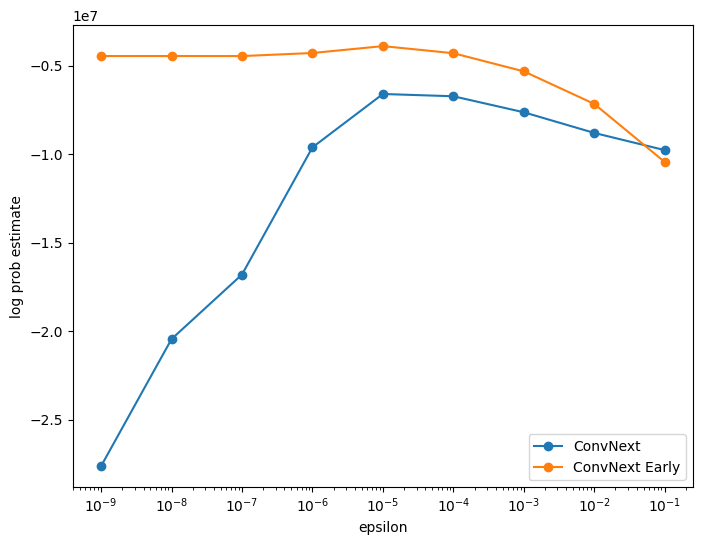

In [8]:
with open(os.path.join(results_dir, "convnext_epsilons_1024_10.pkl"), "rb") as f:
    results, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_epsilons_early_1024_10.pkl"), "rb") as f:
    results_early, cfg = pickle.load(f)

plt.figure(figsize=(8, 6))
maxes = [result.estimates.max() for result in results.values()]
plt.plot(list(results.keys()), maxes, 'o-', label="ConvNeXt")

maxes_early = [result.estimates.max() for result in results_early.values()]
plt.plot(list(results_early.keys()), maxes_early, 'o-', label="ConvNeXt Early")

plt.xlabel("epsilon")
plt.ylabel("log prob estimate")
plt.xscale("log")
plt.legend()
plt.show()

# Final experiments

In [5]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results_tuesday")
sorted(os.listdir(results_dir))

['convnext_chkpts.pkl',
 'convnext_chkpts_True.pkl',
 'convnext_chkpts_True_True.pkl',
 'convnext_chkpts_adam.pkl',
 'convnext_cutoff_1e-05.pkl',
 'convnext_cutoff_1e-05_True.pkl',
 'convnext_cutoff_True_1e-05.pkl',
 'convnext_cutoff_True_1e-05_True.pkl',
 'convnext_epsilon_1e+00.pkl',
 'convnext_epsilon_1e+02.pkl',
 'convnext_epsilon_1e-02.pkl',
 'convnext_epsilon_poison_1e+00.pkl',
 'convnext_epsilon_poison_1e+02.pkl',
 'convnext_epsilon_poison_1e-02.pkl',
 'convnext_exponent_1e-05.pkl',
 'convnext_exponent_1e-05_True.pkl',
 'convnext_exponent_True_1e-05.pkl',
 'convnext_exponent_True_1e-05_True.pkl',
 'convnext_histo.pkl',
 'convnext_histo_True.pkl',
 'convnext_histo_True_True.pkl',
 'convnext_histo_adam.pkl',
 'pythia_chkpts.pkl',
 'pythia_chkpts_True.pkl',
 'pythia_cutoff_1e-05.pkl',
 'pythia_cutoff_True_1e-02.pkl',
 'pythia_cutoff_True_1e-05.pkl',
 'pythia_exponent_1e-05.pkl',
 'pythia_exponent_True_1e-05.pkl',
 'pythia_histo.pkl',
 'pythia_histo_True.pkl']

In [6]:
with open(os.path.join(results_dir, "convnext_chkpts_True.pkl"), "rb") as f:
    _, cfg = pickle.load(f)
    print(cfg.preconditioner_type, cfg.model_name)

with open(os.path.join(results_dir, "convnext_histo_True.pkl"), "rb") as f:
    _, cfg = pickle.load(f)
    print(cfg.preconditioner_type, cfg.model_name)


None b16pai_p4
None b16pai_p4


## histo

In [7]:
pwr = 8
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

None
adam


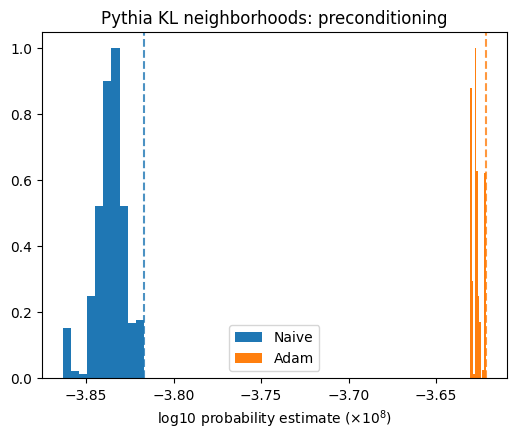

In [8]:
with open(os.path.join(results_dir, "pythia_histo.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "pythia_histo_True.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)
    print(cfg.preconditioner_type)
    
RESULTS = {'Naive': result_naive, 'Adam': result_adam}

plt.figure(figsize=figsize)

settings = {'alpha': 1, 'fill': True}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, (label, results) in enumerate(RESULTS.items()):
    these_settings = dict(settings, label=label, color=colors[i])
    scaled_histogram(results.estimates / multiplier, label, these_settings, nbins=10)
    # Plot vertical line with matching color
    plt.axvline(aggregate(results.estimates) / multiplier, 
                color=colors[i], 
                linestyle='--',
                alpha=0.8)
plt.xlabel(f"log10 probability estimate ({mult_text})")
plt.legend()
plt.title("Pythia KL neighborhoods: preconditioning")

plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_histo.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_histo.pdf"))

plt.show()

In [9]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

None
adam
None
adam


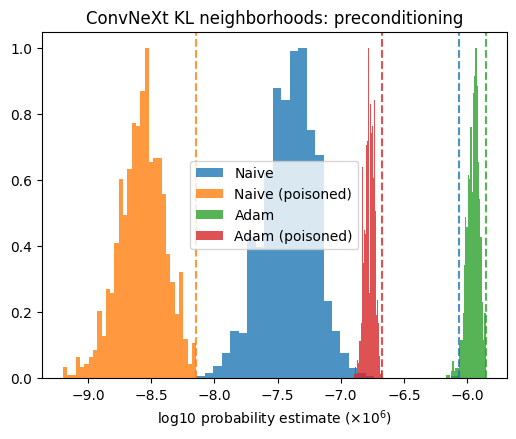

In [10]:
# 'convnext_histo.pkl',
# 'convnext_histo_adam.pkl', adam
#  'convnext_histo_True.pkl', poison
#  'convnext_histo_True_True.pkl', poison adam

with open(os.path.join(results_dir, "convnext_histo.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "convnext_histo_adam.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "convnext_histo_True.pkl"), "rb") as f:
    result_poison, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

with open(os.path.join(results_dir, "convnext_histo_True_True.pkl"), "rb") as f:
    result_poison_adam, cfg = pickle.load(f)
    print(cfg.preconditioner_type)

RESULTS = {'Naive': result_naive, 'Naive (poisoned)': result_poison, 'Adam': result_adam, 'Adam (poisoned)': result_poison_adam}

plt.figure(figsize=figsize)

settings = {'alpha': .8, 'fill': True}

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, (label, results) in enumerate(RESULTS.items()):
    these_settings = dict(settings, label=label, color=colors[i])
    scaled_histogram(results.estimates / multiplier, label, these_settings, nbins=None)
    # Plot vertical line with matching color
    plt.axvline(aggregate(results.estimates) / multiplier, 
                color=colors[i], 
                linestyle='--',
                alpha=0.8)
plt.xlabel(f"log10 probability estimate ({mult_text})")
plt.legend()
plt.title("ConvNeXt KL neighborhoods: preconditioning")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_histo.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_histo.pdf"))
plt.show()


## chkpts

In [11]:
pwr = 8
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

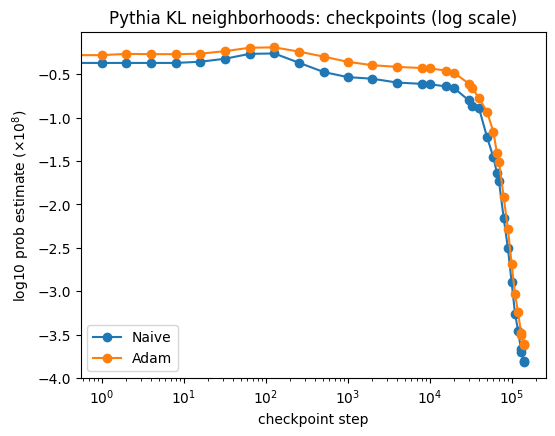

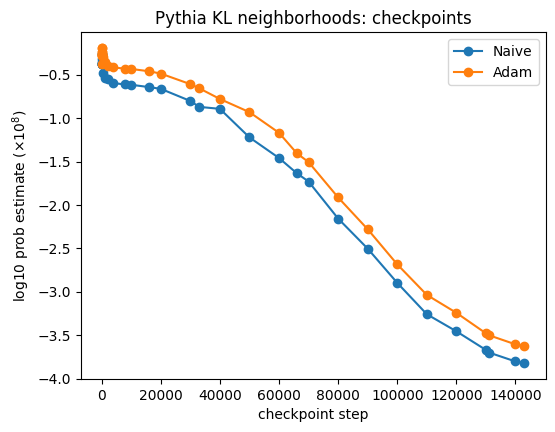

In [12]:
RESULTS = {}

with open(os.path.join(results_dir, "pythia_chkpts.pkl"), "rb") as f:
    RESULTS['naive'], cfg = pickle.load(f)
    
with open(os.path.join(results_dir, "pythia_chkpts_True.pkl"), "rb") as f:
    RESULTS['adam'], cfg = pickle.load(f)
    
# plot maxes against checkpoint steps
plt.figure(figsize=figsize)

maxes_naive = [result.estimates.max() / multiplier for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / multiplier for result in RESULTS['adam'].values()]
plt.plot(list(RESULTS['adam'].keys()), maxes_adam, 'o-', label="Adam")

plt.xlabel("checkpoint step")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.xscale("log")
plt.legend()
plt.title("Pythia KL neighborhoods: checkpoints (log scale)")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_chkpts_log.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_chkpts_log.pdf"))
plt.show()
# plot maxes against checkpoint steps
plt.figure(figsize=figsize)

maxes_naive = [result.estimates.max() / multiplier for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / multiplier for result in RESULTS['adam'].values()]
plt.plot(list(RESULTS['adam'].keys()), maxes_adam, 'o-', label="Adam")

plt.xlabel("checkpoint step")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.legend()
plt.title("Pythia KL neighborhoods: checkpoints")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_chkpts.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_chkpts.pdf"))
plt.show()


In [13]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

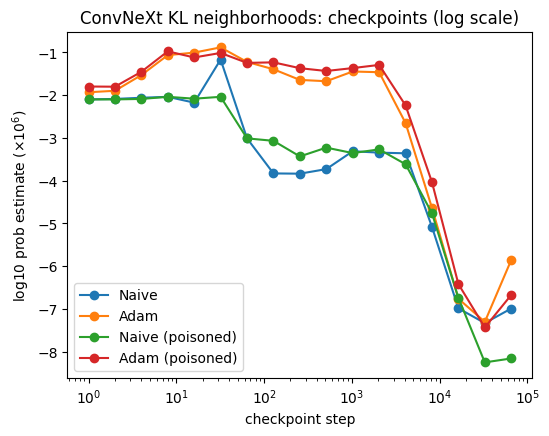

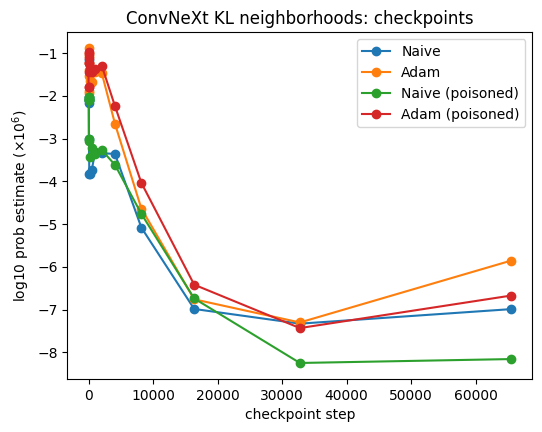

In [14]:
RESULTS = {}

with open(os.path.join(results_dir, "convnext_chkpts.pkl"), "rb") as f:
    RESULTS['naive'], cfg = pickle.load(f)
    
with open(os.path.join(results_dir, "convnext_chkpts_adam.pkl"), "rb") as f:
    RESULTS['adam'], cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_chkpts_True.pkl"), "rb") as f:
    RESULTS['poison'], cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_chkpts_True_True.pkl"), "rb") as f:
    RESULTS['poison_adam'], cfg = pickle.load(f)
    
# plot maxes against checkpoint steps
plt.figure(figsize=figsize)

maxes_naive = [result.estimates.max() / multiplier for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / multiplier for result in RESULTS['adam'].values()]
plt.plot(list(RESULTS['adam'].keys()), maxes_adam, 'o-', label="Adam")

maxes_poison = [result.estimates.max() / multiplier for result in RESULTS['poison'].values()]
plt.plot(list(RESULTS['poison'].keys()), maxes_poison, 'o-', label="Naive (poisoned)")

maxes_poison_adam = [result.estimates.max() / multiplier for result in RESULTS['poison_adam'].values()]
plt.plot(list(RESULTS['poison_adam'].keys()), maxes_poison_adam, 'o-', label="Adam (poisoned)")

plt.xlabel("checkpoint step")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.xscale("log")
plt.legend()
plt.title("ConvNeXt KL neighborhoods: checkpoints (log scale)")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_chkpts_log.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_chkpts_log.pdf"))
plt.show()
# plot maxes against checkpoint steps
plt.figure(figsize=figsize)

maxes_naive = [result.estimates.max() / multiplier for result in RESULTS['naive'].values()]
plt.plot(list(RESULTS['naive'].keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / multiplier for result in RESULTS['adam'].values()]
plt.plot(list(RESULTS['adam'].keys()), maxes_adam, 'o-', label="Adam")

maxes_poison = [result.estimates.max() / multiplier for result in RESULTS['poison'].values()]
plt.plot(list(RESULTS['poison'].keys()), maxes_poison, 'o-', label="Naive (poisoned)")

maxes_poison_adam = [result.estimates.max() / multiplier for result in RESULTS['poison_adam'].values()]
plt.plot(list(RESULTS['poison_adam'].keys()), maxes_poison_adam, 'o-', label="Adam (poisoned)")

plt.xlabel("checkpoint step")
plt.ylabel(f"log10 prob estimate ({mult_text})")

plt.legend()
plt.title("ConvNeXt KL neighborhoods: checkpoints")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_chkpts.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_chkpts.pdf"))
plt.show()

## cutoff

In [15]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results_tuesday")
sorted(os.listdir(results_dir))

['convnext_chkpts.pkl',
 'convnext_chkpts_True.pkl',
 'convnext_chkpts_True_True.pkl',
 'convnext_chkpts_adam.pkl',
 'convnext_cutoff_1e-05.pkl',
 'convnext_cutoff_1e-05_True.pkl',
 'convnext_cutoff_True_1e-05.pkl',
 'convnext_cutoff_True_1e-05_True.pkl',
 'convnext_epsilon_1e+00.pkl',
 'convnext_epsilon_1e+02.pkl',
 'convnext_epsilon_1e-02.pkl',
 'convnext_epsilon_poison_1e+00.pkl',
 'convnext_epsilon_poison_1e+02.pkl',
 'convnext_epsilon_poison_1e-02.pkl',
 'convnext_exponent_1e-05.pkl',
 'convnext_exponent_1e-05_True.pkl',
 'convnext_exponent_True_1e-05.pkl',
 'convnext_exponent_True_1e-05_True.pkl',
 'convnext_histo.pkl',
 'convnext_histo_True.pkl',
 'convnext_histo_True_True.pkl',
 'convnext_histo_adam.pkl',
 'pythia_chkpts.pkl',
 'pythia_chkpts_True.pkl',
 'pythia_cutoff_1e-05.pkl',
 'pythia_cutoff_True_1e-02.pkl',
 'pythia_cutoff_True_1e-05.pkl',
 'pythia_exponent_1e-05.pkl',
 'pythia_exponent_True_1e-05.pkl',
 'pythia_histo.pkl',
 'pythia_histo_True.pkl']

In [16]:
model_dim = 30494720

In [17]:
pwr = 8
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)


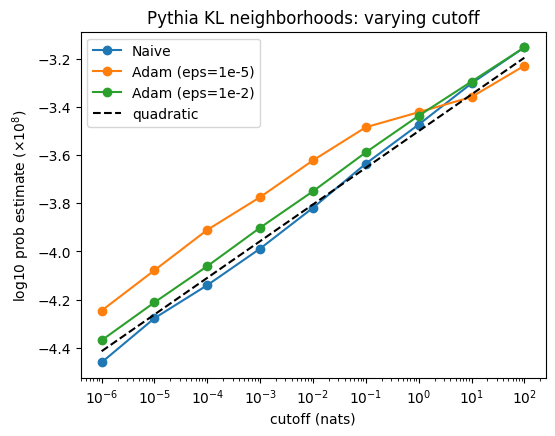

In [18]:
with open(os.path.join(results_dir, "pythia_cutoff_1e-05.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_cutoff_True_1e-05.pkl"), "rb") as f:
    result_adam_loweps, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_cutoff_True_1e-02.pkl"), "rb") as f:
    result_adam_higheps, cfg = pickle.load(f)

# plot maxes against cutoffs

plt.figure(figsize=figsize)

maxes_naive = [result.estimates.max() / multiplier for result in result_naive.values()]
plt.plot(list(result_naive.keys()), maxes_naive, 'o-', label="Naive")

maxes_adam_loweps = [result.estimates.max() / multiplier for result in result_adam_loweps.values()]
plt.plot(list(result_adam_loweps.keys()), maxes_adam_loweps, 'o-', label="Adam (eps=1e-5)")

maxes_adam_higheps = [result.estimates.max() / multiplier for result in result_adam_higheps.values()]
plt.plot(list(result_adam_higheps.keys()), maxes_adam_higheps, 'o-', label="Adam (eps=1e-2)")

# line with slope model_dim/2
plt.plot(list(result_adam_higheps.keys()), 
         [model_dim/2 * np.log(cutoff) / multiplier - 3.5 for cutoff in result_adam_higheps.keys()], 
         '--', color="black", 
         label="quadratic")

plt.xlabel("cutoff (nats)")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.xscale("log")
plt.legend()
plt.title("Pythia KL neighborhoods: varying cutoff")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_cutoff.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_cutoff.pdf"))
plt.show()

In [19]:
convnext_model = load_convnext_checkpoint(f"{BASIN_VOLUME_DIR}/runs/b16pai_p001/checkpoint-1")
convnext_model_dim = torch.nn.utils.parameters_to_vector(convnext_model.parameters()).shape[0]
print(convnext_model_dim)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 47.54 GiB of which 9.44 MiB is free. Process 3972771 has 24.24 GiB memory in use. Process 4027178 has 21.32 GiB memory in use. Process 4023256 has 1.95 GiB memory in use. Of the allocated memory 6.49 MiB is allocated by PyTorch, and 1.51 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [20]:
convnext_model_dim = 3388810

In [30]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

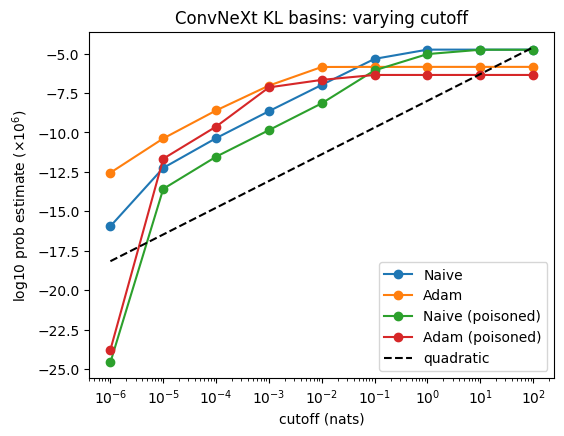

In [31]:
#  'convnext_cutoff_1e-05.pkl',
#  'convnext_cutoff_1e-05_True.pkl', poison
#  'convnext_cutoff_True_1e-05.pkl', adam
#  'convnext_cutoff_True_1e-05_True.pkl', poison adam

with open(os.path.join(results_dir, "convnext_cutoff_1e-05.pkl"), "rb") as f:
    result_naive, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_cutoff_1e-05_True.pkl"), "rb") as f:
    result_poison, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_cutoff_True_1e-05.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_cutoff_True_1e-05_True.pkl"), "rb") as f:
    result_poison_adam, cfg = pickle.load(f)


plt.figure(figsize=figsize)

maxes_naive = [result.estimates.max() / multiplier for result in result_naive.values()]
plt.plot(list(result_naive.keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / multiplier for result in result_adam.values()]
plt.plot(list(result_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_poison = [result.estimates.max() / multiplier for result in result_poison.values()]
plt.plot(list(result_poison.keys()), maxes_poison, 'o-', label="Naive (poisoned)")

maxes_poison_adam = [result.estimates.max() / multiplier for result in result_poison_adam.values()]
plt.plot(list(result_poison_adam.keys()), maxes_poison_adam, 'o-', label="Adam (poisoned)")

# line with slope model_dim/2
plt.plot(list(result_poison_adam.keys()), 
         [convnext_model_dim/2 * np.log(cutoff) / multiplier - 8 for cutoff in result_poison_adam.keys()], 
         '--', color="black", 
         label="quadratic")

plt.xlabel("cutoff (nats)")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.xscale("log")
plt.legend()
plt.title("ConvNeXt KL neighborhoods: varying cutoff")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_cutoff.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_cutoff.pdf"))
plt.show()


## exponent


In [32]:
pwr = 8
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)

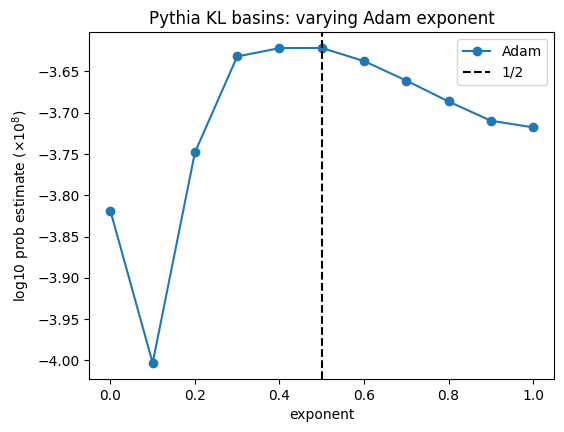

In [33]:

# with open(os.path.join(results_dir, "pythia_exponent_1e-05.pkl"), "rb") as f:
#     result_naive, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_exponent_True_1e-05.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)

plt.figure(figsize=figsize)

# maxes_naive = [result.estimates.max() / np.log(10) for result in result_naive.values()]
# plt.plot(list(result_naive.keys()), maxes_naive, 'o-', label="Naive")

maxes_adam = [result.estimates.max() / multiplier for result in result_adam.values()]
plt.plot(list(result_adam.keys()), maxes_adam, 'o-', label="Adam")
plt.axvline(0.5, 0, 10, color="black", linestyle="--", label="1/2")

plt.xlabel("exponent")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.legend()
plt.title("Pythia KL neighborhoods: varying Adam exponent")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_exponent.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "pythia_exponent.pdf"))
plt.show()


In [34]:
pwr = 6
multiplier = 10**pwr * np.log(10)
mult_text = f"$\\times 10^{{{pwr}}}$"
figsize = (6, 4.5)


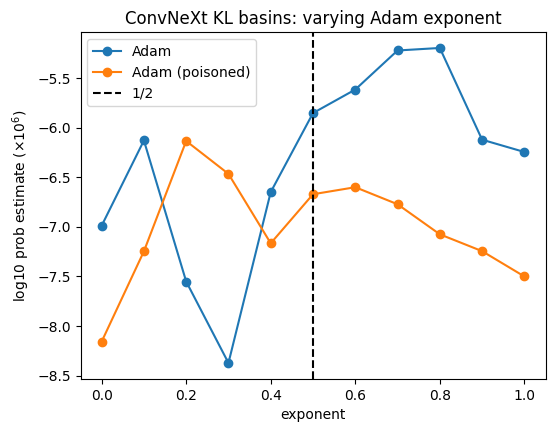

In [35]:
with open(os.path.join(results_dir, "convnext_exponent_True_1e-05.pkl"), "rb") as f:
    result_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "convnext_exponent_True_1e-05_True.pkl"), "rb") as f:
    result_poison_adam, cfg = pickle.load(f)

plt.figure(figsize=figsize)

maxes_adam = [result.estimates.max() / multiplier for result in result_adam.values()]
plt.plot(list(result_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_poison_adam = [result.estimates.max() / multiplier for result in result_poison_adam.values()]
plt.plot(list(result_poison_adam.keys()), maxes_poison_adam, 'o-', label="Adam (poisoned)")

plt.axvline(0.5, 0, 10, color="black", linestyle="--", label="1/2")

plt.xlabel("exponent")
plt.ylabel(f"log10 prob estimate ({mult_text})")
plt.legend()
plt.title("ConvNeXt KL neighborhoods: varying Adam exponent")
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_exponent.svg"))
plt.savefig(os.path.join(BASIN_VOLUME_DIR, "plots", "convnext_exponent.pdf"))
plt.show()